In [1]:
import torch
import torch.nn as nn

# Parameter

In [2]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256  # parameter

W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))

W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

# Activate Function

In [3]:
def relu(x):
    a = torch.zeros_like(x)
    return torch.max(x, a)

# Model

In [4]:
def net(x):
    x = x.reshape((-1, num_inputs))
    x = relu(x@W1 + b1)
    return x@W2 + b2

# Loss Function

In [5]:
criterion = nn.CrossEntropyLoss()

# dataset

In [6]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist_train = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
mnist_test = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

print(len(mnist_train), len(mnist_test))
print(mnist_test[0][0].shape)

60000 10000
torch.Size([1, 28, 28])


In [7]:
from torch.utils.data import DataLoader

batch_size = 256

train_loader = DataLoader(mnist_train, batch_size=256, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=256, shuffle=False)

# Train

In [8]:
num_epochs, lr = 10, 0.1
optimizer = torch.optim.SGD(params, lr)

In [11]:
import matplotlib.pyplot as plt

def train(num_epochs, net, optimizer):
    def run_epoch(net, dataloader, train):
        total_loss = 0
        if train:
            for inputs, labels in dataloader:
                optimizer.zero_grad()
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            return total_loss
        else:
            with torch.no_grad():
                for inputs, labels in dataloader:
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)
                    total_loss += loss.item()
                return total_loss
    
    loss_list = []
    for _ in range(num_epochs):
        run_epoch(net, train_loader, True)
        loss_list.append(run_epoch(net, test_loader, False))
    
    epochs = list(range(1, len(loss_list) + 1))
    plt.plot(epochs, loss_list, label='Train Loss', color='blue', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

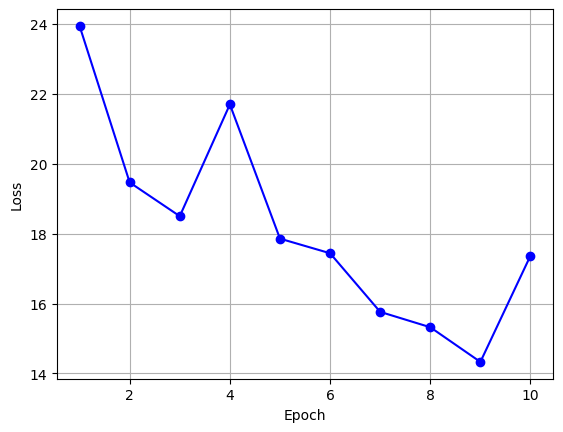

In [12]:
train(num_epochs, net, optimizer)

# MLP in `torch.nn`

In [13]:
net2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net2.apply(init_weight)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

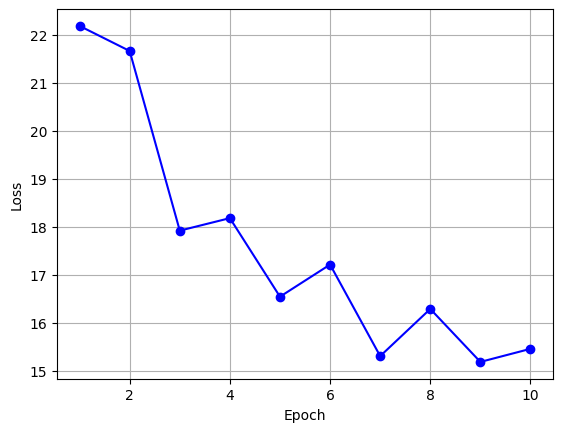

In [14]:
num_epochs, lr = 10, 0.1
optimizer = torch.optim.SGD(net2.parameters(), lr)

train(num_epochs, net2, optimizer)